In [1]:
from src.core import strategy
from src.core.analytics import metrics, estimators, features
import yfinance as yf

prices = yf.download("ACWI, BND, VNQ, SPY, QQQ, ARKW")["Adj Close"]


features.momentum(prices, 1)

[*********************100%***********************]  6 of 6 completed


ACWI   -0.070764
ARKW   -0.385347
BND    -0.047208
QQQ    -0.107972
SPY    -0.078190
VNQ    -0.201561
dtype: float64

In [25]:
import pandas as pd

pr_date = prices.index[-1] - pd.DateOffset(years = 1)

prices.iloc[-1] / prices.iloc[prices.index.get_loc(pr_date)] - 1

ACWI   -0.070764
ARKW   -0.385347
BND    -0.047208
QQQ    -0.107972
SPY    -0.078190
VNQ    -0.201561
dtype: float64

AttributeError: 'dict' object has no attribute 'formType'

In [31]:
import json

import pandas as pd
from sec_api import QueryApi
from sec_api import ExtractorApi
from src.config import EDGAR_API

queryApi = QueryApi(api_key=EDGAR_API)

query = {
    "query": {
        "query_string": {
            "query": "ticker:TSLA",
        }
    },
    "from": "200",
    "size": "300",
    "sort": [{"filedAt": {"order": "desc"}}],
}

response = queryApi.get_filings(query)


metadata = pd.DataFrame.from_records(response["filings"])

print(metadata)


# extractorApi = ExtractorApi(EDGAR_API)


# sections_10_k = {
#     "1": "Business",
#     "1A": "Risk Factors",
#     "1B": "Unresolved Staff Comments",
#     "2": "Properties",
#     "3": "Legal Proceedings",
#     "4": "Mine Safety Disclosures",
#     "5": "Market for Registrant’s Common Equity, Related Stockholder Matters and Issuer Purchases of Equity Securities",
#     "6": "Selected Financial Data (prior to February 2021)",
#     "7": "Management’s Discussion and Analysis of Financial Condition and Results of Operations",
#     "7A": "Quantitative and Qualitative Disclosures about Market Risk",
#     "8": "Financial Statements and Supplementary Data",
#     "9": "Changes in and Disagreements with Accountants on Accounting and Financial Disclosure",
#     "9A": "Controls and Procedures",
#     "9B": "Other Information",
#     "10": "Directors, Executive Officers and Corporate Governance",
#     "11": "Executive Compensation",
#     "12": "Security Ownership of Certain Beneficial Owners and Management and Related Stockholder Matters",
#     "13": "Certain Relationships and Related Transactions, and Director Independence",
#     "14": "Principal Accountant Fees and Services",
# }


# for id, f in enumerate(response["filings"]):
#     if f["formType"] == "10-K":
#         url_10k = f["linkToFilingDetails"]

#         out = {}

#         for sec, des in sections_10_k.items():
#             out[des] = extractorApi.get_section(url_10k, sec, "text")

#         filename = f"{id}.json"

#         with open(filename, "w") as f:
#             json.dump(out, f)


    ticker  ... groupMembers
0     TSLA  ...          NaN
1     TSLA  ...          NaN
2     TSLA  ...          NaN
3     TSLA  ...          NaN
4     TSLA  ...          NaN
..     ...  ...          ...
195   TSLA  ...          NaN
196   TSLA  ...          NaN
197   TSLA  ...          NaN
198   TSLA  ...          NaN
199   TSLA  ...          NaN

[200 rows x 21 columns]


In [32]:
metadata.to_csv(
    'test.csv'
)

In [15]:
response['filings'][0]['linkToTxt']

'https://www.sec.gov/Archives/edgar/data/1318605/000156459023005126/0001564590-23-005126.txt'

In [16]:


# 8-K example
url_8k = "https://www.sec.gov/Archives/edgar/data/66600/000149315222016468/form8-k.htm"

item_1_1_text = extractorApi.get_section(response['filings'][0]['linkToTxt'], "1-1", "text")
item_1_1_text

'processing'

In [ ]:


stra = strategy.HierarchicalEqualRiskContribution(prices=prices).simulate(
    start="2015-1-1"
)
stra.value.plot()
# weights_bm = prices.notna().divide(prices.notna().sum(axis=1), axis=0)
# metrics.to_pri_return(prices=prices).multiply(weights_bm).sum(axis=1).loc["2015-1-1":].add(1).cumprod().multiply(1000).plot()
stra.analytics()

In [1]:
from src import db


with db.SessionContext() as session:
    
    query = session.query(db.models.Meta)
    
    result = list(record.to_dict() for record in query.all())
    
print(result)

[{'created_date': '2023-02-24T21:12:13.153878', 'last_modified_date': '2023-02-24T21:12:13.153878', 'id': 1, 'ticker': '435550', 'isin': 'KR7435550009', 'security_class': 'Equity', 'security_type': 'ETP', 'name': 'Kiwoom HEROES TDF 2050 Active ETF', 'ticker_yahoo': None, 'ticker_bloomberg': '435550 KS Equity', 'ticker_naver': '435550', 'ticker_fred': None, 'ticker_eikon': None, 'iso_code': 'KR', 'remark': None, 'source': 'naver', 'wrap_asset_class_code': '02'}, {'created_date': '2023-02-24T21:12:13.153878', 'last_modified_date': '2023-02-24T21:12:13.153878', 'id': 2, 'ticker': '435540', 'isin': 'KR7435540000', 'security_class': 'Equity', 'security_type': 'ETP', 'name': 'Kiwoom HEROES TDF 2040 Active ETF', 'ticker_yahoo': None, 'ticker_bloomberg': '435540 KS Equity', 'ticker_naver': '435540', 'ticker_fred': None, 'ticker_eikon': None, 'iso_code': 'KR', 'remark': None, 'source': 'naver', 'wrap_asset_class_code': '02'}, {'created_date': '2023-02-24T21:12:13.153878', 'last_modified_date': 

In [5]:
import pandas as pd

pd.DataFrame(result)

,created_date,last_modified_date,id,ticker,isin,security_class,security_type,name,ticker_yahoo,ticker_bloomberg,ticker_naver,ticker_fred,ticker_eikon,iso_code,remark,source,wrap_asset_class_code
0,2023-02-24T21:12:13.153878,2023-02-24T21:12:13.153878,1,435550,KR7435550009,Equity,ETP,Kiwoom HEROES TDF 2050 Active ETF,None,435550 KS Equity,435550,None,None,KR,None,naver,02
1,2023-02-24T21:12:13.153878,2023-02-24T21:12:13.153878,2,435540,KR7435540000,Equity,ETP,Kiwoom HEROES TDF 2040 Active ETF,None,435540 KS Equity,435540,None,None,KR,None,naver,02
2,2023-02-24T21:12:13.153878,2023-02-24T21:12:13.153878,3,435530,KR7435530001,Equity,ETP,Kiwoom HEROES TDF 2030 Active ETF,None,435530 KS Equity,435530,None,None,KR,None,naver,02
3,2023-02-24T21:12:13.153878,2023-02-24T21:12:13.153878,4,435040,KR7435040001,Equity,ETP,KIM KINDEX Bloomberg Global Brand TOP10 ETF,None,435040 KS Equity,435040,None,None,KR,None,naver,02
4,2023-02-24T21:12:13.153878,2023-02-24T21:12:13.153878,5,434960,KR7434960001,Equity,ETP,Daishin DAISHIN343 K200 ETF,None,434960 KS Equity,434960,None,None,KR,None,naver,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,2023-02-27T23:19:49.766455,2023-02-27T23:19:49.766455,4562,ZGFIX,None,Equity,Open-End Fund,Ninety One Glb Franchise I,None,ZGFIX US Equity,None,None,None,US,None,bloomberg,_
4562,2023-02-27T23:19:49.766455,2023-02-27T23:19:49.766455,4563,ZIFIX,None,Equity,Open-End Fund,Ninety One International Franchise I,None,ZIFIX US Equity,None,None,None,US,None,bloomberg,_
4563,2023-02-27T23:19:49.766455,2023-02-27T23:19:49.766455,4564,ZSCIX,None,Equity,Open-End Fund,Zacks Small-Cap Core Institutional,None,ZSCIX US Equity,None,None,None,US,None,bloomberg,_
4564,2023-02-27T23:19:49.766455,2023-02-27T23:19:49.766455,4565,ZVGIX,None,Equity,Open-End Fund,Zevenbergen Genea Institutional,None,ZVGIX US Equity,None,None,None,US,None,bloomberg,_


In [5]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# create line chart trace
line_trace = go.Scatter(
    x=stra.value.index, y=stra.value.values, mode="lines", name=stra.value.name
)

# create stacked bar chart traces
bar_traces = []
for col in stra.allocations.columns:
    trace = go.Bar(x=stra.allocations.index, y=stra.allocations[col]*100, name=col)
    bar_traces.append(trace)

# create subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

# add line chart to the first subplot with its own legend
fig.add_trace(line_trace, row=1, col=1)
fig.update_traces(showlegend=True, row=1, col=1)

# add stacked bar chart to the second subplot with its own legend
for trace in bar_traces:
    fig.add_trace(trace, row=2, col=1)
    fig.update_traces(showlegend=True, row=2, col=1)

# update chart layout and style
fig.update_layout(
    title="My Beautiful Subplots",
    xaxis_title="Date",
    yaxis_title="Values",
    template="plotly_dark",
    hovermode="x unified",
    showlegend=True,
    legend=dict(
        x=0.5,
        y=1.2,
        orientation='h',
        xanchor='center',
        yanchor='bottom',
        bordercolor="white",
        borderwidth=1,
        bgcolor="white",
        font=dict(size=12),
    ),
    font=dict(family="Arial", size=12, color="black"),
    barmode="stack",
    # add legends for subplots
    annotations=[
        dict(
            x=0.5,
            y=1.1,
            xref="paper",
            yref="paper",
            showarrow=False,
            text="<b>Line Chart</b>",
            font=dict(size=14),
            align="center",
        ),
        dict(
            x=0.5,
            y=0.6,
            xref="paper",
            yref="paper",
            showarrow=False,
            text="<b>Stacked Bar Chart</b>",
            font=dict(size=14),
            align="center",
        ),
    ],
)

# show the chart
fig.show()


<AxesSubplot:>

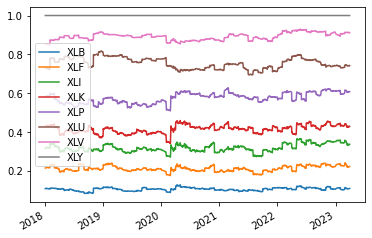

In [8]:
stra.weights.plot(stacked=True)